In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale

In [2]:
df=pd.read_csv('startup_funding21.csv')
df.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [3]:
df.shape

(1209, 9)

In [4]:
df['Amount($)'].unique()

array(['$1,200,000 ', '$120,000,000 ', '$30,000,000 ', '$51,000,000 ',
       '$2,000,000 ', '$188,000,000 ', '$200,000 ', 'Undisclosed',
       '$1,000,000 ', '$3,000,000 ', '$100,000 ', '$700,000 ',
       '$9,000,000 ', '$40,000,000 ', '$49,000,000 ', '$400,000 ',
       '$300,000 ', '$25,000,000 ', '$160,000,000 ', '$150,000 ',
       '$1,800,000 ', '$5,000,000 ', '$850,000 ', '$53,000,000 ',
       '$500,000 ', '$1,100,000 ', '$6,000,000 ', '$800,000 ',
       '$10,000,000 ', '$21,000,000 ', '$7,500,000 ', '$26,000,000 ',
       '$7,400,000 ', '$1,500,000 ', '$600,000 ', '$800,000,000 ',
       '$17,000,000 ', '$3,500,000 ', '$15,000,000 ', '$215,000,000 ',
       '$2,500,000 ', '$350,000,000 ', '$5,500,000 ', '$83,000,000 ',
       '$110,000,000 ', '$500,000,000 ', '$65,000,000 ',
       '$150,000,000,000.00 ', '$300,000,000 ', '$2,200,000 ',
       '$35,000,000 ', '$140,000,000 ', '$4,000,000 ', '$13,000,000 ',
       nan, '$Undisclosed', '$9,500,000 ', '$8,000,000 ', 'Upsparks'

In [5]:
df['Amount($)']=df['Amount($)'].str.replace('$','')

C:\Users\Wycliffe\AppData\Local\Temp\ipykernel_7280\1927010862.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Amount($)']=df['Amount($)'].str.replace('$','')


In [6]:
df['Amount($)'].head()

0      1,200,000 
1    120,000,000 
2     30,000,000 
3     51,000,000 
4      2,000,000 
Name: Amount($), dtype: object

In [7]:
df.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","2,000,000",Seed


In [8]:
# Find the total number of Undisclosed entries
undisclosed_count = df[df['Amount($)'] == 'Undisclosed']['Amount($)'].count()
undisclosed_count 

116

In [9]:

def clean_amount(amount_str):
    try:
        # Remove commas and dollar signs
        amount_str = amount_str.replace(',', '').replace('$', '')
        
        # Check for invalid strings
        if amount_str in ['Undisclosed', 'Upsparks', 'Series C', 'Seed', 'ITO Angel Network, LetsVenture', 'JITO Angel Network, LetsVenture']:
            return np.nan
        
        # Check for extra symbols
        if '$$' in amount_str:
            amount_str = amount_str.replace('$$', '$')
        
        return float(amount_str)
    except:
        return np.nan

df['Amount($)'] = df['Amount($)'].apply(clean_amount)


In [10]:
df['Amount($)'].dtype


dtype('float64')

In [11]:
df['Amount($)'].isna().sum()

153

In [12]:
df.dropna(subset=['Amount($)'],inplace=True)

In [13]:
df['Founded'].head()

0    2019.0
1    2015.0
2    2012.0
3    2015.0
4    2021.0
Name: Founded, dtype: float64

In [14]:
df['Founded'].isnull().sum()


1

In [15]:
# Replace NaN values with 0
df['Founded'].fillna(0, inplace=True)

# Convert column to integer type
df['Year_Founded'] = df['Founded'].astype(int)



In [16]:
df['Year_Founded'].head()

0    2019
1    2015
2    2012
3    2015
4    2021
Name: Year_Founded, dtype: int32

In [17]:
df.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year_Founded
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2019
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,NaN,2015
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,2012
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,2015
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,2021


In [18]:
df.drop('Founded', axis=1, inplace= True)

In [19]:
df.head()

,Company/Brand,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year_Founded
0,Unbox Robotics,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2019
1,upGrad,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,NaN,2015
2,Lead School,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,2012
3,Bizongo,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,2015
4,FypMoney,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,2021


In [20]:
df['Stage'].unique()

array(['Pre-series A', nan, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Bridge', 'Seed+', 'Series F2', 'Series A+', 'Series G',
       'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'Series D1', 'Seies A', 'Pre-series', 'Series A2',
       'Series I'], dtype=object)

In [21]:
df.isna().sum()

Company/Brand      0
HeadQuarter        1
Sector             0
What it does       0
Founders           4
Investor          56
Amount($)          0
Stage            355
Year_Founded       0
dtype: int64

In [22]:
df.drop('Stage', axis= 1, inplace= True)

In [23]:
df.head()

,Company/Brand,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Year_Founded
0,Unbox Robotics,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,2019
1,upGrad,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,2015
2,Lead School,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,2012
3,Bizongo,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,2015
4,FypMoney,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,2021


In [24]:
df['HeadQuarter'].fillna('Unknown', inplace=True)


In [25]:
df.head()

,Company/Brand,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Year_Founded
0,Unbox Robotics,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,2019
1,upGrad,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,2015
2,Lead School,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,2012
3,Bizongo,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,2015
4,FypMoney,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,2021


In [26]:
# Startups and the number of investors
investor_counts = df.groupby('Company/Brand')['Investor'].count().sort_values(ascending=False)
investor_counts.head()


Company/Brand
BharatPe    8
BYJU'S      4
Siply       3
Bewakoof    3
OYO         3
Name: Investor, dtype: int64

In [27]:
# group by funding
funding = df.groupby('Company/Brand')['Amount($)'].max().sort_values(ascending=False)
funding.head()

Company/Brand
Alteria Capital     1.500000e+11
VerSe Innovation    1.000000e+09
Dream Sports        8.400000e+08
Swiggy              8.000000e+08
OYO                 6.600000e+08
Name: Amount($), dtype: float64

<AxesSubplot:xlabel='Investor', ylabel='Company/Brand'>

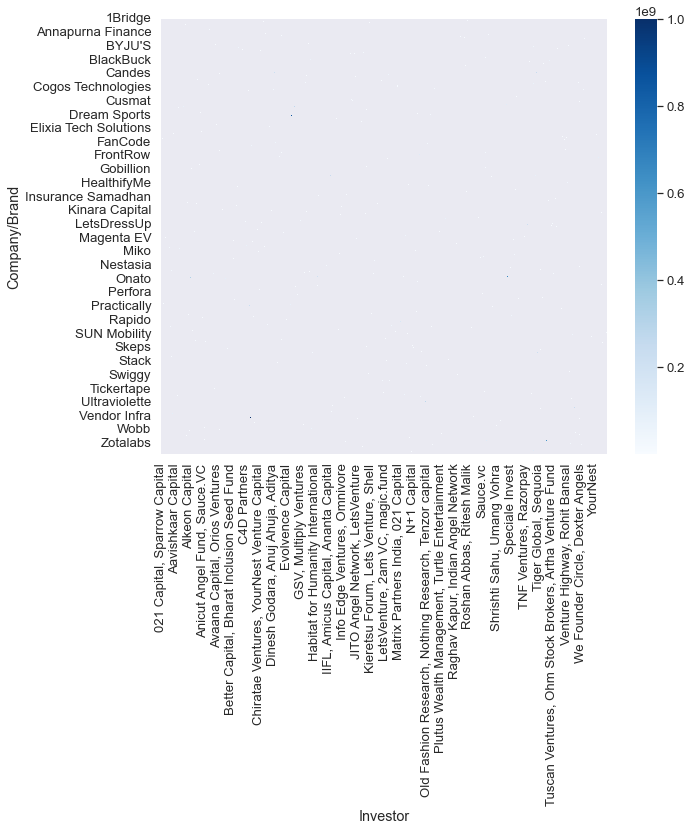

In [28]:
# create a pivot table of investors and funding
pivot_df = pd.pivot_table(df, values='Amount($)', index='Company/Brand', columns='Investor')

# create the heatmap
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, cmap='Blues')

In [29]:
df.head()

,Company/Brand,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Year_Founded
0,Unbox Robotics,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,2019
1,upGrad,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,2015
2,Lead School,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,2012
3,Bizongo,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,2015
4,FypMoney,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,2021


In [30]:
# Set the locale to  ("en_US" for United States)
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Format the Amount($) column as currency
df['Amount($)'] = df['Amount($)'].map('${:,.2f}'.format)